In [3]:
using SymPy
using Plots

In [11]:
function normalize(x,inner)
    x/sqrt(inner(x,x))
end
    
function GramSchmidt(x,inner) #implements the modified gramschmidt, to minimize rounding errors
    
    out = typeof(x)(length(x)) #must return array of same type
        
    for (i,vec) in enumerate(x)
        out[i] = vec
        
        if i > 1
            out[i] -= inner(vec,out[1])*out[1]
        end
        
        
        for j = 2:(i-1)
            out[i] -= inner(out[i],out[j])*out[j]
        end
                
        out[i] = normalize(out[i],inner)
            
    end 
    out
end


function dotpoly(f,g) 
    integrate(f*g,(x,-PI,PI))
end

function proj(v,U,inner)
    out = 0
    for u in U
        out += inner(v,u)*u
    end
    out
end

proj (generic function with 1 method)

Example of Use: we approximate sin(x) with polynomials up to degree 5

In [5]:
@vars x

(x,)

The gramschmidt function finds an orthonormal function based on the array of vectors, and the inner product given to it.
Note, the inner product we gave here (the function dotpoly) minimizes the sum of errors on the interval 0 to pi

In [12]:
basis = GramSchmidt([1,x,x^2,x^3,x^4,x^5],dotpoly)

6-element Array{SymPy.Sym,1}:
                                                         sqrt(2)/(2*sqrt(pi))
                                                       sqrt(6)*x/(2*pi^(3/2))
                                       3*sqrt(10)*(x^2 - pi^2/3)/(4*pi^(5/2))
                                   5*sqrt(14)*(x^3 - 3*pi^2*x/5)/(4*pi^(7/2))
           105*sqrt(2)*(x^4 - 6*pi^2*(x^2 - pi^2/3)/7 - pi^4/5)/(16*pi^(9/2))
 63*sqrt(22)*(x^5 - 3*pi^4*x/7 - 10*pi^2*(x^3 - 3*pi^2*x/5)/9)/(16*pi^(11/2))

In [13]:
approx = proj(sin(x),basis,dotpoly) #gets the orthogonal projection of v on U

                              /           /      3       \            /       
                              |      ____ |  2*pi        |       ____ |       
               /         2  \ |  5*\/ 14 *|- ----- + 6*pi|   5*\/ 14 *|-6*pi +
          ____ | 3   3*pi *x| |           \    5         /            \       
      5*\/ 14 *|x  - -------|*|- ------------------------- + -----------------
               \        5   / |               7/2                        7/2  
3*x                           \           4*pi                       4*pi     
--- + ------------------------------------------------------------------------
  2                                           7/2                             
pi                                        4*pi                                

     3\\             /            /              5        3\             /    
 2*pi ||             |       ____ |          8*pi    40*pi |        ____ |  40
 -----||             |  63*\/ 22 *|-120*pi - ----- 

In [14]:
function wrap(x) #wrapper because the plot function doesn't like Sym object on relatively complicated functions
    float(approx(x))
end

wrap (generic function with 1 method)

We plot the results obtained:

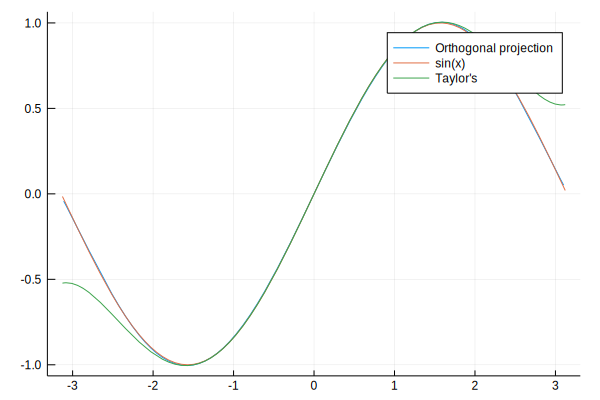

In [15]:
debut=-pi
fin=pi
plot(wrap, debut,fin,label="Orthogonal projection")
plot!(sin,debut,fin,label="sin(x)")
plot!(x-x^3/factorial(3)+x^5/factorial(5),debut,fin,label="Taylor's")

Comparison of the error

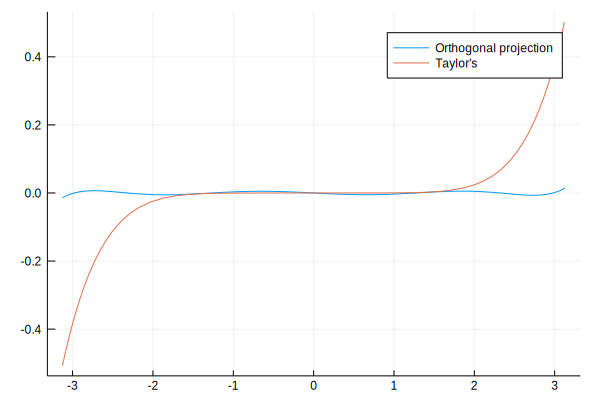

In [27]:
plot(x -> wrap(x)-sin(x),debut,fin,label="Orthogonal projection")
plot!(x -> x-x^3/factorial(3)+x^5/factorial(5)-sin(x),debut,fin,label="Taylor's")